In [6]:
from __future__ import print_function

from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

folder = 'figures'
! mkdir $folder

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

study = flotilla.embark('singlecell_pnm_miso_modalities', flotilla_dir=flotilla_dir)

2016-07-14 12:07:42	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_miso_modalities/datapackage.json
2016-07-14 12:07:42	Parsing datapackage to create a Study object
2016-07-14 12:08:27 	Initializing Study
2016-07-14 12:08:27 	Initializing Predictor configuration manager for Study
2016-07-14 12:08:27	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-07-14 12:08:27	Added ExtraTreesClassifier to default predictors
2016-07-14 12:08:27	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-07-14 12:08:27	Added ExtraTreesRegressor to default predictors
2016-07-14 12:08:27	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-07-14 12:08:27	Added GradientBoostingClassifier to default predictors
2016-07-14 12:08:27	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.g

In [7]:
modalities_counts = study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).count().reset_index()
modalities_counts = modalities_counts.rename(columns={'event_id': '# AS events'})
modalities_counts.head()

,phenotype,modality,# AS events
0,MN,bimodal,1244
1,MN,excluded,3277
2,MN,included,3058
3,MN,middle,34
4,MN,uncategorized,3745


In [8]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR

modalities_counts_2d = modalities_counts.pivot(index='phenotype', columns='modality', values='# AS events')
modalities_counts_2d = modalities_counts_2d.reindex(columns=MODALITY_ORDER, index=study.phenotype_order)
modalities_counts_2d = modalities_counts_2d.T
modalities_counts_2d

phenotype,iPSC,NPC,MN
modality,,,
excluded,5147,3836,3277
bimodal,805,813,1244
included,5806,3918,3058
middle,111,56,34
uncategorized,5819,4799,3745


In [9]:
modalities_counts_2d = modalities_counts_2d.fillna(0)
modalities_counts_2d

phenotype,iPSC,NPC,MN
modality,,,
excluded,5147,3836,3277
bimodal,805,813,1244
included,5806,3918,3058
middle,111,56,34
uncategorized,5819,4799,3745


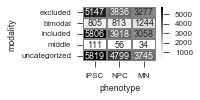

In [10]:
sns.set(style='ticks', context='paper')
fig, ax= plt.subplots(figsize=(2.75, 1.5))
mask = modalities_counts_2d.isnull()
sns.heatmap(modalities_counts_2d, annot=True, mask=mask, fmt='g', annot_kws=dict(size=9), 
            cmap='Greys', linewidth=1, linecolor='grey')
fig.tight_layout()
fig.savefig('{}/modalities_counts_heatmap.pdf'.format(folder))

### Plot modality percentage barplots

In [13]:
modalities_counts['percentage'] = 100*modalities_counts.groupby('phenotype')['# AS events'].apply(lambda x: x/x.sum())
modalities_counts

,phenotype,modality,# AS events,percentage
0,MN,bimodal,1244,10.952633
1,MN,excluded,3277,28.851911
2,MN,included,3058,26.923754
3,MN,middle,34,0.299348
4,MN,uncategorized,3745,32.972354
5,NPC,bimodal,813,6.057219
6,NPC,excluded,3836,28.579943
7,NPC,included,3918,29.190881
8,NPC,middle,56,0.417225
9,NPC,uncategorized,4799,35.754731


In [14]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR

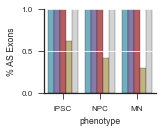

In [17]:

fig, ax = plt.subplots(figsize=(2, 1.5))

# ax = axes[0]
sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
            hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order, zorder=-1)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
ax.set(ylabel='% AS Exons')
ax.grid(axis='y', color='white', zorder=100)
sns.despine()
fig.savefig('{}/modalities_barplot.pdf'.format(folder))

ax.set(ylim=(0, 1))
# ax.grid(axis='y', color='grey', zorder=np.inf)
fig.savefig('{}/modalities_barplot_zoom.pdf'.format(folder))

# ax.legend_.set_visible(False)
# ax.locator_params('y', nbins=4)
# sns.despine(ax=ax, bottom=True)
# ax.tick_params(axis='x', bottom='off')
# ax.set(xticks=[], xlabel='', ylim=(10, 65), ylabel='', yticks=[10, 35, 60])

# ax = axes[1]
# sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
#            hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order)
# ax.set(ylim=(0, 0.5), ylabel='% AS Exons', 
#        xlabel='')
# ax.legend_.set_visible(False)
# ax.locator_params('y', nbins=4)
# sns.despine(ax=ax)
# # fig.tight_layout()
# fig.savefig('{}/modalities_barplot.pdf'.format(folder))